In [9]:
import pandas
import get_fit_data as gf
import matplotlib.pyplot as plt
import datetime 
import matplotlib.dates as mdates
import streamlit as st
import os
import string
import pycwt as wavelet
import numpy as np
import datetime as dt
import matplotlib
import pandas as pd
import pickle

In [4]:
def get_data(radar, start, end):
    fdata = gf.FetchData( radar, [start, end] )
    beams,vect = fdata.fetch_data(by="scan")
    data = fdata.convert_to_pandas(beams)
    
    return data

def plot_scan(data, radar, time):
    fig = plt.figure()
    data = data.where(data.time == time).dropna()
    ax = fig.add_subplot(projection='polar')

    mesh = plt.scatter(np.deg2rad(3.68 * data.bmnum), data.slist, c=data.v, s=1, cmap='RdBu')
    
    
def rti(data, radar, beam_num, maxrange=60):
    data = data.where(data.bmnum == beam_num).dropna()
    fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 6))
    #maxrange = int(max(data.nrang))
    i_scatter = data.where(data.gflg == 0).dropna()
    g_scatter = data.where(data.gflg == 1).dropna()
    #power plot
    fig.suptitle(radar.upper() + ' Beam #' + str(beam_num), fontsize=16)
    a0 = axs[0].scatter(data.time, data.slist, c = data.p_l, vmin = 0, vmax=40, cmap='plasma', marker = 's', s=3)
    cbar = fig.colorbar(a0, ax=axs[0])
    cbar.set_label('Power, dB')

    #velocity plot
    #axs[1].scatter(g_scatter.time, g_scatter.slist, c = "grey", marker = 's', s=8)
    a1 = vels = axs[1].scatter(data.time, data.slist, c = data.v, vmin = -500, vmax=500, cmap='RdBu', marker = 's', s=3)
    cbar = fig.colorbar(a1, ax=axs[1])
    cbar.set_label('Velocity, m/s')
    


    for nn, ax in enumerate(axs):
        print(ax)
        locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.set_xlim([start, end])
        ax.set_ylim([0, maxrange])
        ax.set_yticks([0, maxrange / 2, maxrange])
        ax.set_yticklabels([0, int(45 * (maxrange / 2)), int(maxrange * 45)])
        ax.set_ylabel("Slant Range, km")
        
def rti_v(data, radar, beam_num, maxrange=60):
    data = data.where(data.bmnum == beam_num).dropna()
    data.slist = data.slist * 45
    maxrange = maxrange * 45
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 2.7))
    i_scatter = data.where(data.gflg == 0).dropna()
    g_scatter = data.where(data.gflg == 1).dropna()
    fig.suptitle(radar.upper() + ' Beam #' + str(beam_num), fontsize=16)

    #velocity plot
    #axs[1].scatter(g_scatter.time, g_scatter.slist, c = "grey", marker = 's', s=8)
    a1 = vels = axs.scatter(data.time, data.slist, c = data.v, vmin = -500, vmax=500, cmap='RdBu', marker = 's', s=2)
    cbar = fig.colorbar(a1, aspect=40)
    cbar.set_label('Velocity, m/s')
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    axs.xaxis.set_major_locator(locator)
    axs.xaxis.set_major_formatter(formatter)
    axs.set_xlim([start, end])
    axs.set_ylim([0, maxrange])
    #axs.set_yticks([0, maxrange / 2, maxrange])
    #axs.set_yticklabels([0, int(45 * (maxrange / 2)), int(maxrange * 45)])
    axs.set_ylabel("Slant Range, km")

def freq_noise(data):
    data = data.where(data.bmnum == beam_num).dropna()
    fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 2))

    #frequency plot
    a0 = axs[0].plot(data.time, data.tfreq, c='black')
    axs[0].set_xticklabels([])
    axs[0].set_ylim([8000, 18000])
    axs[0].set_yticks([8000, 13000, 18000])
    axs[0].set_ylabel('freq, kHz')

    #n_sky plot
    a1 = axs[1].plot(data.time, data['noise.sky'], c='black')
    axs[1].set_yscale('log')
    axs[1].set_ylim([1, 100000])
    axs[1].set_ylabel('Sky Noise')
    
def list_radars(start):
    radar_lst = []

    for radar in os.listdir('/sd-data/' + str(start.year) + '/fitacf/'):
        str_list =  os.listdir('/sd-data/' + str(start.year) + '/fitacf/' + radar + '/')
        str_list = [elem.split('.')[0] for elem in str_list]
        goal_str = str(start.year) + str(start.month).zfill(2) + str(start.day).zfill(2) 
        if goal_str in str_list:
            radar_lst.append(radar)
    return radar_lst

In [23]:
def make_scan(radar, beam, start, end, savescan=False):
    data = get_data(radar, start, end)
    bm_data = data.where(data.bmnum == beam_num).dropna()
    if savescan:
        bm_data.to_pickle('radar_' + str(start.date()) + radar + str(beam) + '.pkl')
    return bm_data

In [24]:
radar = "cve"
beam_num = 18
start = dt.datetime(2017, 9, 7, 23)
end = dt.datetime(2017, 9, 8, 3)
bm_data = make_scan(radar, beam_num, start, end, savescan=True)

2021-10-05 16:41:11.625 INFO    pyDARNio: Reading Fitacf file: stream


Read file -  /sd-data/2017/fitacf/cve/20170907.2201.00.cve.fitacf.bz2


2021-10-05 16:41:17.079 INFO    pyDARNio: Reading Fitacf file: stream


Read file -  /sd-data/2017/fitacf/cve/20170908.0001.00.cve.fitacf.bz2


2021-10-05 16:41:22.606 INFO    pyDARNio: Reading Fitacf file: stream


Read file -  /sd-data/2017/fitacf/cve/20170908.0201.00.cve.fitacf.bz2

 Started converting to beam data.

 Converted to beam data.

 Started converting to scan data.

 Converted to scan data.


In [21]:
print(str(start.date()))

2017-09-07


In [11]:
print(bm_data.head())

     bmnum  gflg   noise.sky  npts  nrang        p_l  scan  slist    tfreq  \
199   18.0   1.0  141.699997  16.0  100.0  24.356434   0.0    2.0  14727.0   
200   18.0   1.0  141.699997  16.0  100.0  14.973265   0.0    3.0  14727.0   
201   18.0   1.0  141.699997  16.0  100.0  30.203745   0.0   41.0  14727.0   
202   18.0   1.0  141.699997  16.0  100.0  29.708254   0.0   42.0  14727.0   
203   18.0   1.0  141.699997  16.0  100.0  25.964193   0.0   43.0  14727.0   

                          time         v        w_l  
199 2017-09-07 23:00:53.693877 -4.365675  11.700307  
200 2017-09-07 23:00:53.693877 -7.952096 -10.490098  
201 2017-09-07 23:00:53.693877  2.102349  -0.784830  
202 2017-09-07 23:00:53.693877  2.591173  -2.590165  
203 2017-09-07 23:00:53.693877  4.694778   1.346980  


2021-10-05 16:06:10.233 INFO    pyDARNio: Reading Fitacf file: stream


Read file -  /sd-data/2017/fitacf/cve/20170907.2201.00.cve.fitacf.bz2


2021-10-05 16:06:15.812 INFO    pyDARNio: Reading Fitacf file: stream


Read file -  /sd-data/2017/fitacf/cve/20170908.0001.00.cve.fitacf.bz2


2021-10-05 16:06:21.330 INFO    pyDARNio: Reading Fitacf file: stream


Read file -  /sd-data/2017/fitacf/cve/20170908.0201.00.cve.fitacf.bz2

 Started converting to beam data.

 Converted to beam data.

 Started converting to scan data.

 Converted to scan data.


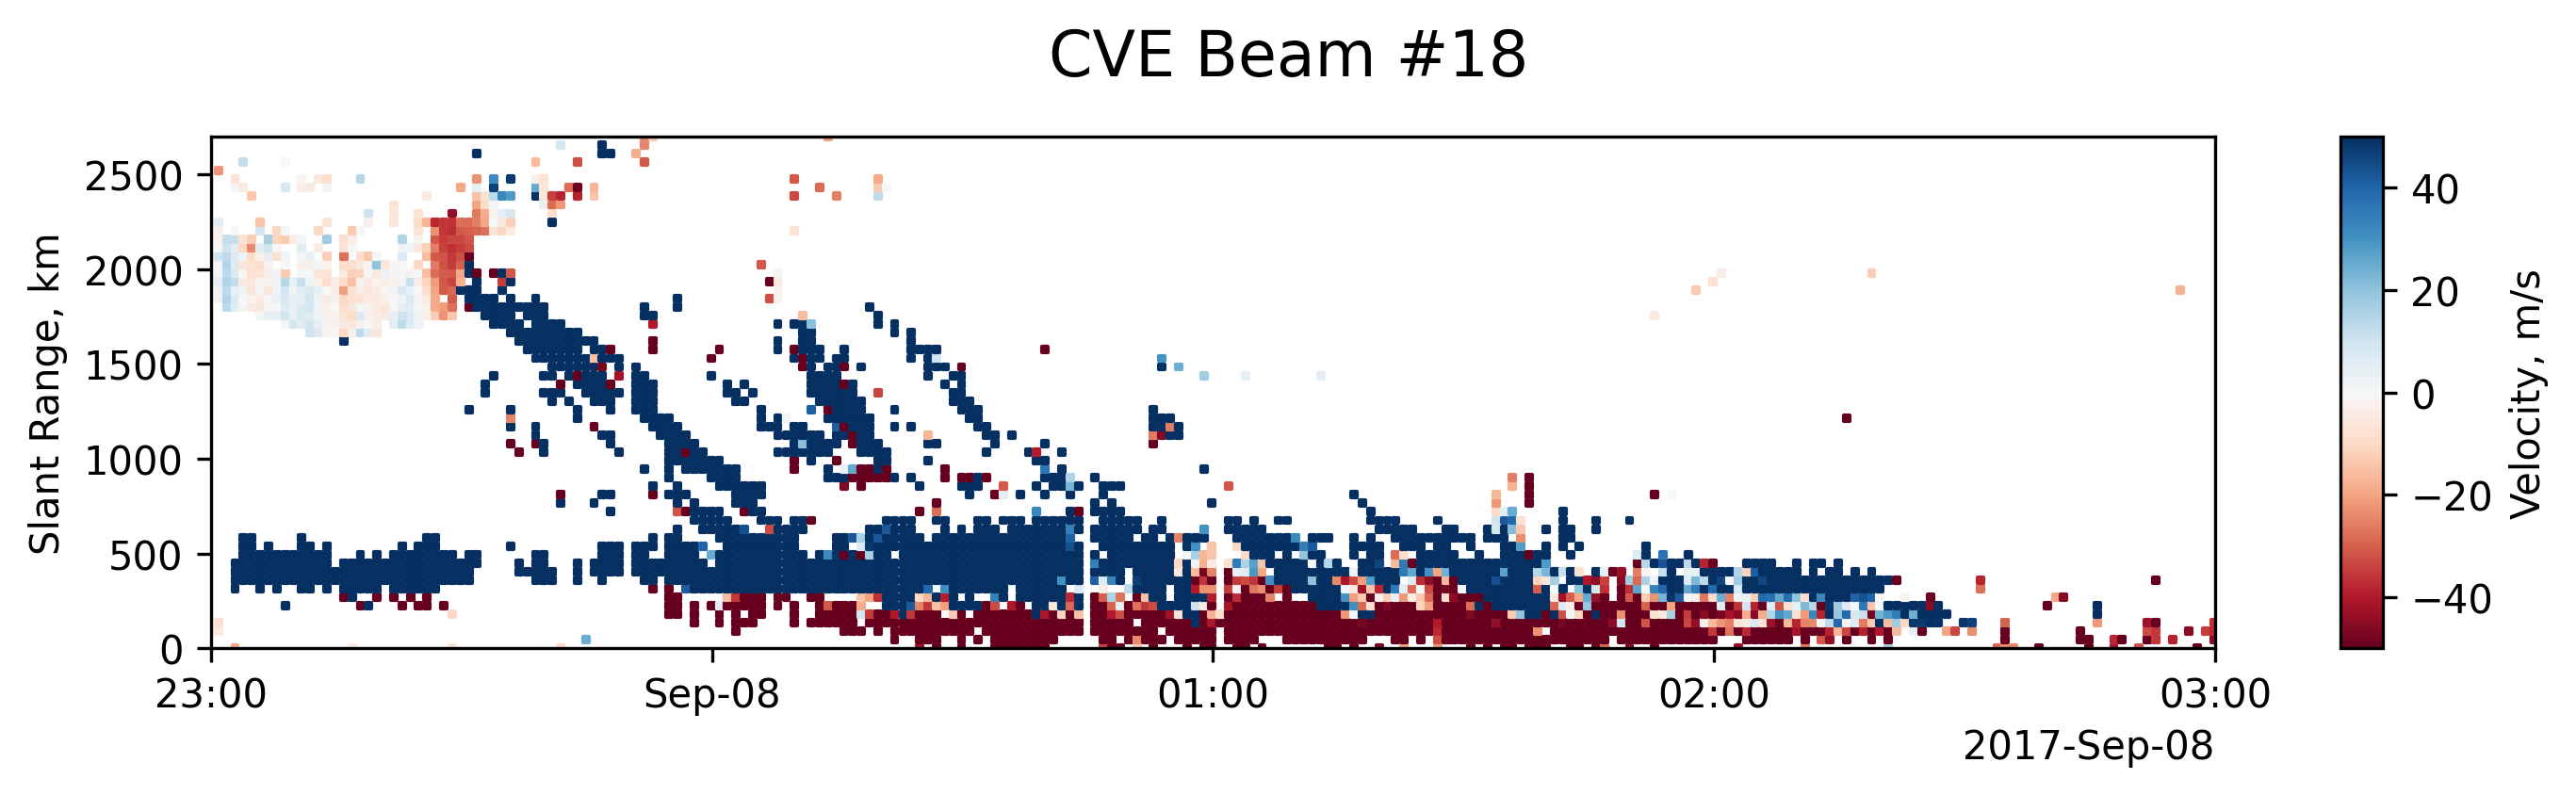

In [3]:
#variables
matplotlib.rcParams['figure.dpi'] = 300
radar = "cve"
beam_num = 18
start = dt.datetime(2017, 9, 7, 23)
end = dt.datetime(2017, 9, 8, 3)
data = get_data(radar, start, end)
bm_data = data.where(data.bmnum == beam_num).dropna()
rti_v(bm_data, radar, beam_num)

AxesSubplot(0.125,0.536818;0.64325x0.343182)
AxesSubplot(0.125,0.125;0.64325x0.343182)


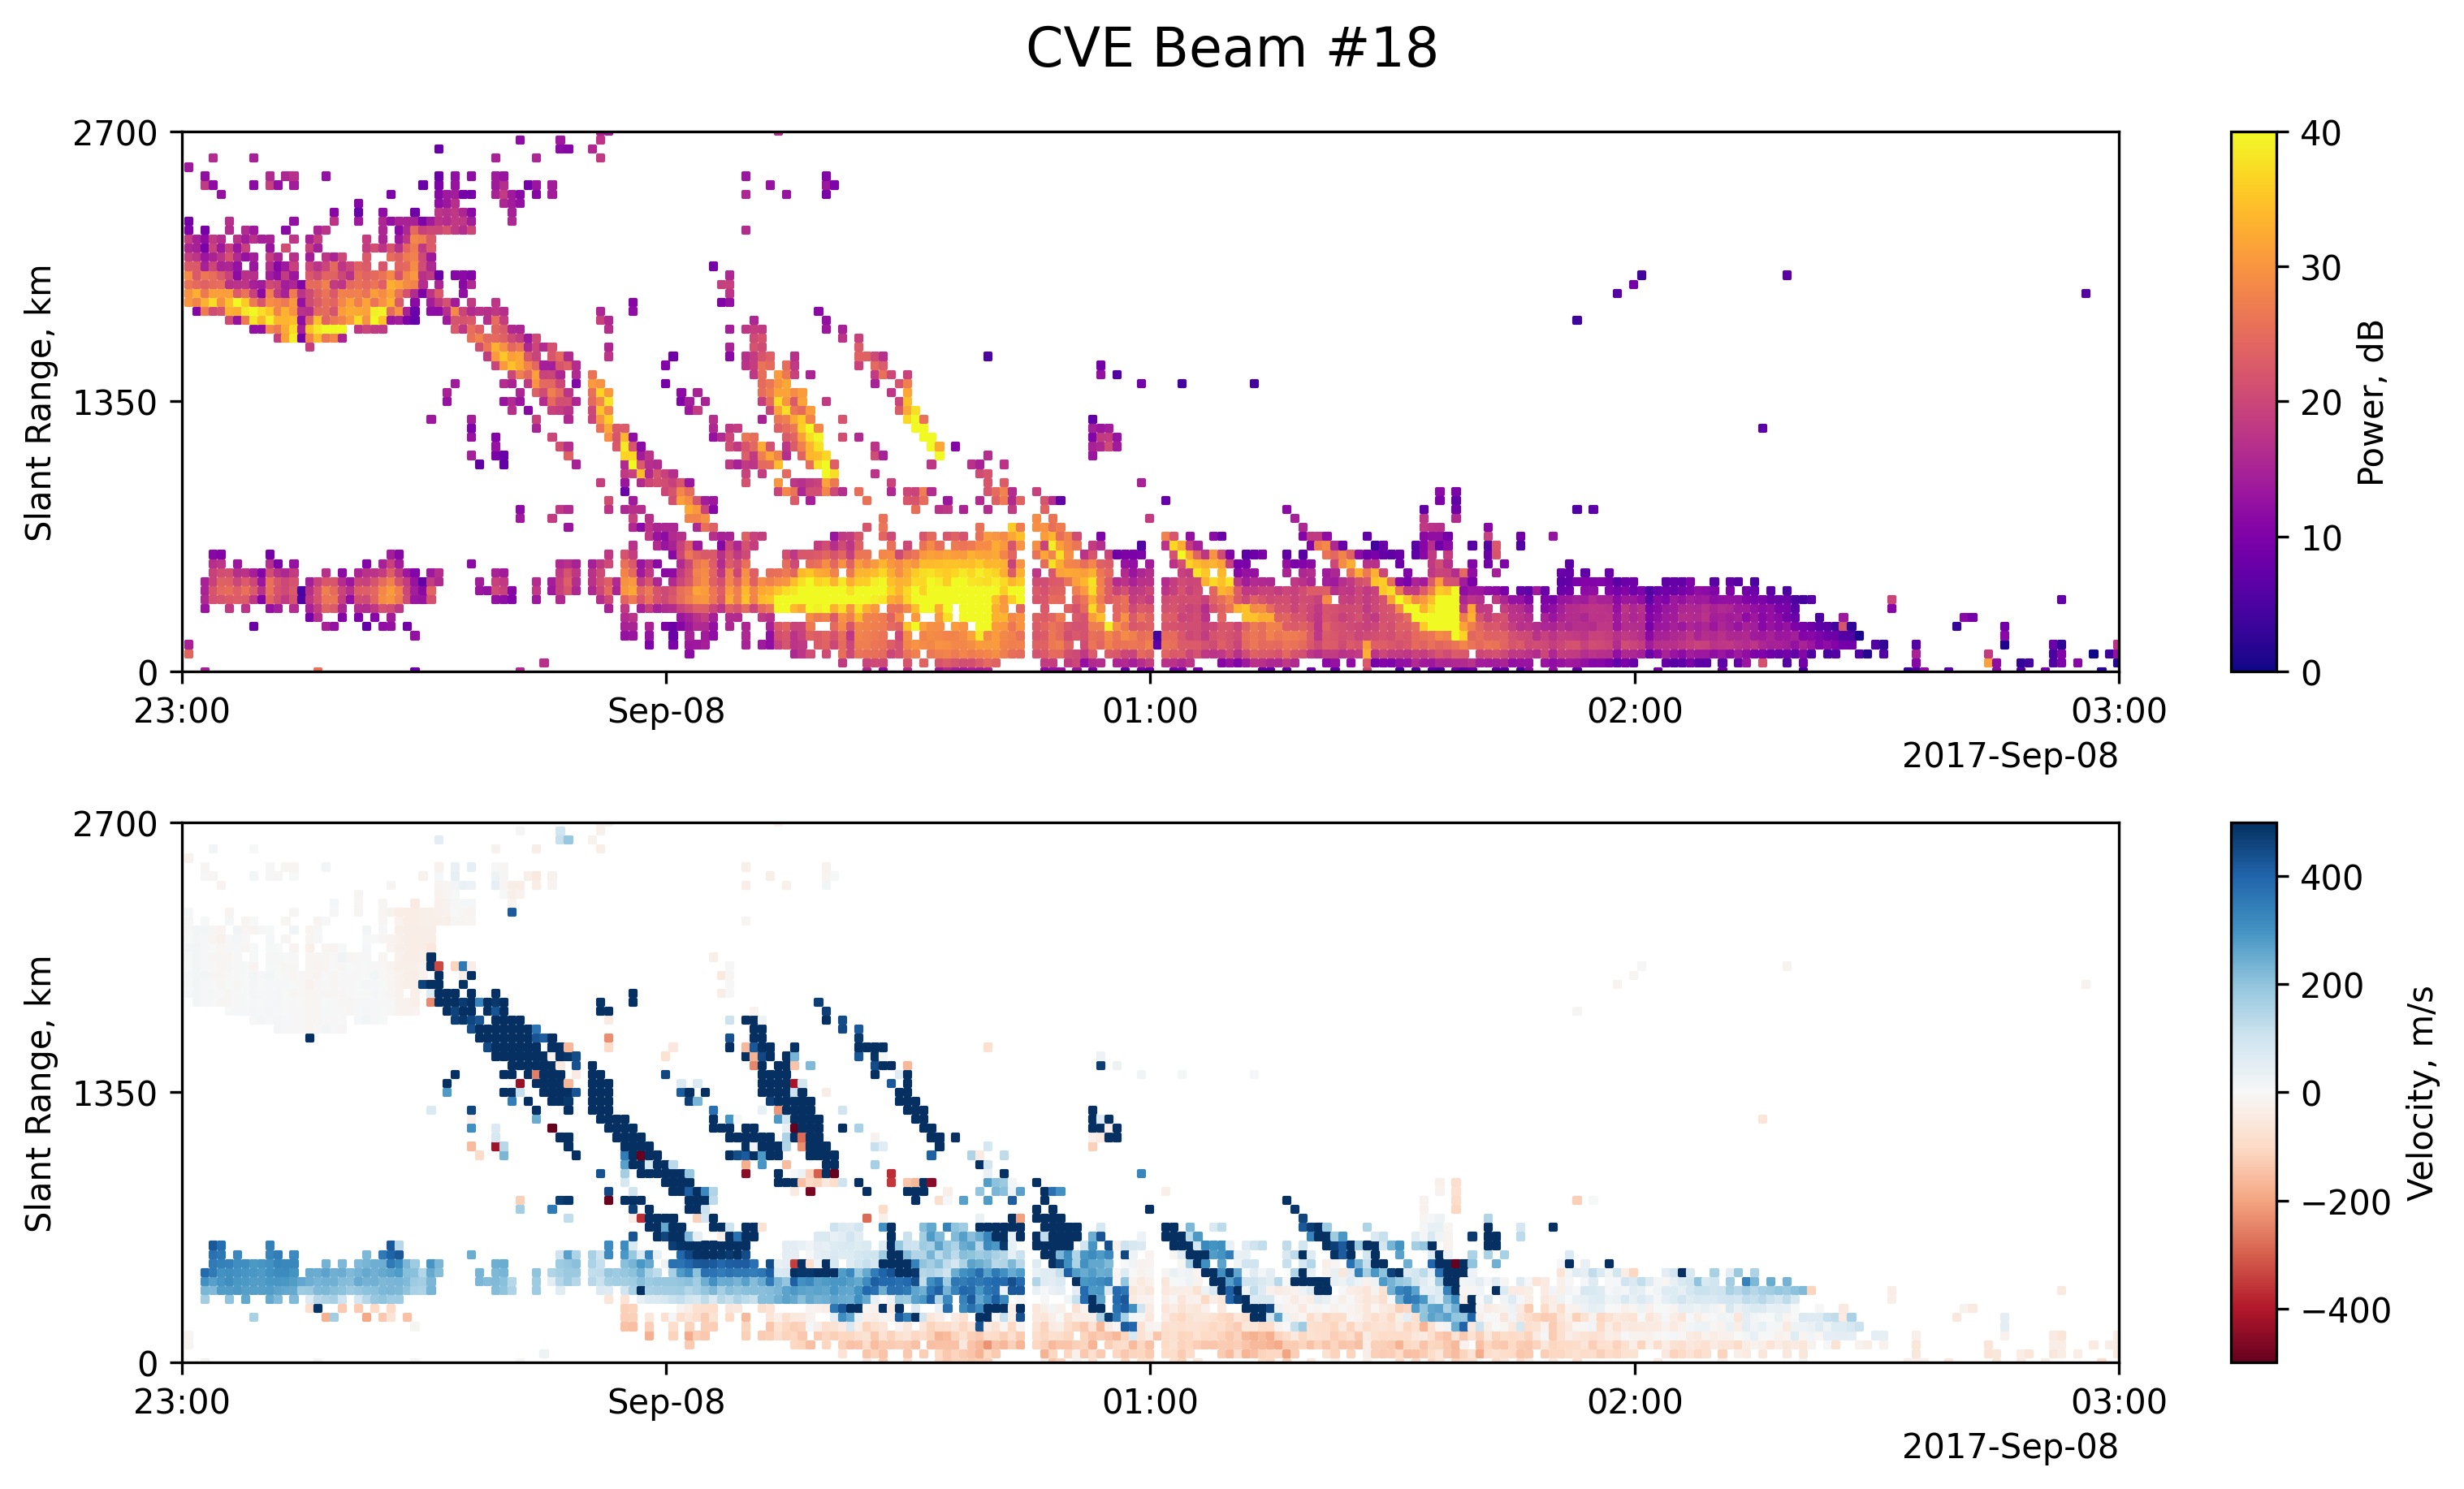

In [6]:
for beam_num in [18]:
    bm_data = data.where(data.bmnum == beam_num).dropna()
    rti(bm_data, radar, beam_num)
    #vel_t(bm_data, radar, beam_num, 500, 1000)

In [95]:
def vel_t(data, radar, beam_num, startrange, endrange):
    data.slist = data.slist * 45
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 2.7))
    fig.suptitle(radar.upper() + ' Beam #' + str(beam_num) + ' betweem ' + str(startrange) + ' and ' + str(endrange) +'km', fontsize=16)
    data = data.where(data['v'] < 800).dropna()
    data = data.where(data['v'] > 0).dropna()
    data = data.where(data['slist'] > startrange).dropna()
    data = data.where(data['slist'] < endrange).dropna()
    a1 = vels = axs.scatter(data.time, data.v, s=2, marker='s', c='k')
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    axs.xaxis.set_major_locator(locator)
    axs.xaxis.set_major_formatter(formatter)
    axs.set_xlim([start, end])
    axs.set_ylim([-1000, 1000])
    #axs.set_yticks([0, maxrange / 2, maxrange])
    #axs.set_yticklabels([0, int(45 * (maxrange / 2)), int(maxrange * 45)])
    axs.set_ylabel("Velocity, m/s")
    grouped = data.set_index('time').groupby(pd.Grouper(freq='s')).mean().dropna()
    axs.plot(grouped.index, grouped.v, c='r')
    

Text(0.5, 1.0, 'CVE LOS Velocities from2017-09-08 00:30:00 to 2017-09-08 00:35:00')

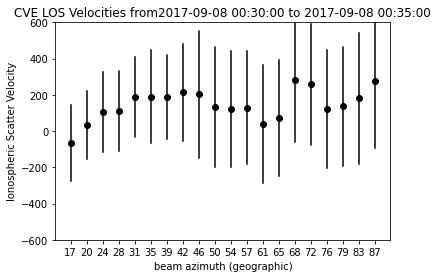

In [126]:
start = dt.datetime(2017, 9, 8,0,30)
end = start + dt.timedelta(minutes = 5)

bm_data = data.where(data.time < end).dropna()
bm_data = bm_data.where(bm_data.time > start).dropna()
bm_data = bm_data.where(bm_data.gflg == 0).dropna()
beams = []
for beam in bm_data.bmnum.unique():
    mean = bm_data[bm_data['bmnum'] == beam]['v'].median()
    std = bm_data[bm_data['bmnum'] == beam]['v'].std()
    beams.append(beam)
    plt.scatter(beam, mean,c='k')
    plt.plot([beam, beam], [mean - std, mean + std], c='k')
plt.ylim([-600,600])

plt.xticks(beams, labels = [int(bnum * 3.68 +17.2) for bnum in beams])
plt.xlabel('beam azimuth (geographic)')
plt.ylabel('Ionospheric Scatter Velocity')
plt.title('CVE LOS Velocities from' + str(start) + ' to ' + str(end))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


(17416.916666666668, 17417.125)

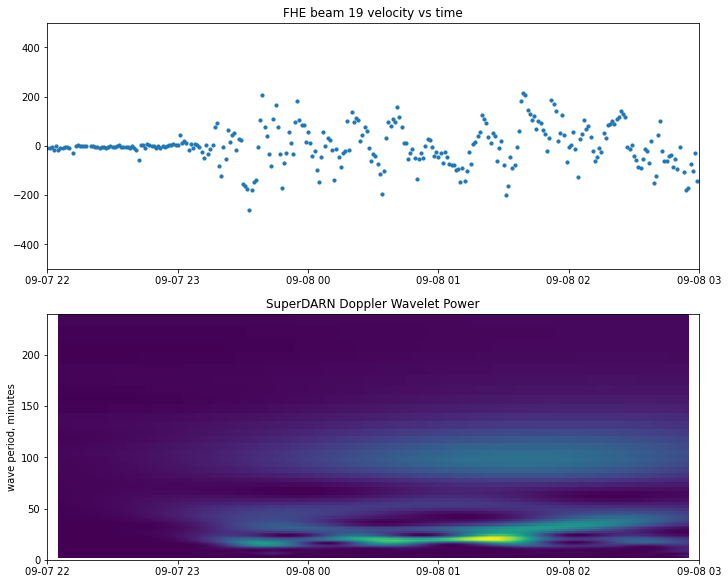

In [45]:
bm_data = data.where(data.bmnum == 19).dropna()
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(10, 8))

dt = 60

bm_data = bm_data
limited = bm_data.where(abs(bm_data['v']) < 500).dropna()

grouped = limited.set_index('time').groupby(pd.Grouper(freq='s')).mean().dropna()
detrend = grouped.v - grouped.rolling(360, center=True, min_periods=1).mean().v

axs[0].scatter(detrend.index, detrend, s=10)
#axs[0].plot(detrend.index, detrend, c='k')
axs[0].set_title('FHE beam 19 velocity vs time')

dt = 60
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(detrend.rolling(10, center=True).mean().dropna().values, dt)
power = (np.abs(wave)) ** 2
period = 1 / freqs
power /= scales[:, None]

mesh = axs[1].pcolormesh(detrend.rolling(10, center=True).mean().dropna().index, period / 60, power)

axs[1].set_ylabel('wave period, minutes')
axs[1].set_title('SuperDARN Doppler Wavelet Power')

axs[1].set_ylim([0,240])
axs[0].set_ylim([-500,500])
axs[0].set_xlim([start, end])
axs[1].set_xlim([start, end])


In [288]:
def xwt_wtc_analysis(t1,s1,t2,s2,dt=1):
    #make sure s1 and s2 have the same length and time resolution 
    #dt = np.diff(t1)[0]
    n1 = t1.size
    n2 = t2.size
    n = min(n1, n2)
    
    # II. Cross-wavelet transform
    # ===========================

    # Calculate the cross wavelet transform (XWT). The XWT finds regions in time
    # frequency space where the time series show high common power. Torrence and
    # Compo (1998) state that the percent point function -- PPF (inverse of the
    # cumulative distribution function) -- of a chi-square distribution at 95%
    # confidence and two degrees of freedom is Z2(95%)=3.999. However, calculating
    # the PPF using chi2.ppf gives Z2(95%)=5.991. To ensure similar significance
    # intervals as in Grinsted et al. (2004), one has to use confidence of 86.46%.
    W12, cross_coi, freq, signif = wavelet.xwt(s1, s2, dt, dj=1/12, s0=-1, J=-1,
                                               significance_level=0.8646,
                                               wavelet='morlet', normalize=True)

    cross_power = np.abs(W12)**2
    cross_sig = np.ones([1, n]) * signif[:, None]
    cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
    cross_period = 1/freq

    # Calculate the wavelet coherence (WTC). The WTC finds regions in time
    # frequency space where the two time seris co-vary, but do not necessarily have
    # high power.
    WCT, aWCT, corr_coi, freq, sig = wavelet.wct(s1, s2, dt, dj=1/12, s0=-1, J=-1,
                                                 significance_level=0.8646,
                                                 wavelet='morlet', normalize=True,
                                                 cache=True)

    cor_sig = np.ones([1, n]) * sig[:, None]
    cor_sig = np.abs(WCT) / cor_sig  # Power is significant where ratio > 1
    cor_period = 1 / freq

    # Calculates the phase between both time series. The phase arrows in the
    # cross wavelet power spectrum rotate clockwise with 'north' origin.
    # The relative phase relationship convention is the same as adopted
    # by Torrence and Webster (1999), where in phase signals point
    # upwards (N), anti-phase signals point downwards (S). If X leads Y,
    # arrows point to the right (E) and if X lags Y, arrow points to the
    # left (W).
    angle = 0.5 * np.pi - aWCT
    #u, v = np.cos(angle), np.sin(angle)
    return cross_period,cross_power,cross_sig,cross_coi,cor_period,WCT,cor_sig,corr_coi,angle

In [293]:

t1 = grouped18.index[0:260]
t2 = grouped19.index
s1 = grouped18.v.values[0:260]
s2 = grouped19.v.values

cross_period,cross_power,cross_sig,cross_coi,cor_period,WCT,cor_sig,corr_coi,angle = xwt_wtc_analysis(t1,s1,t2,s2,dt=1)

/home/jupyter-ian_kelley/.local/lib/python3.7/site-packages/pycwt/wavelet.py:562: RuntimeWarning: invalid value encountered in arctanh
  aa = np.round(np.arctanh(np.array([al1, al2]) * 4))
  0%|          | 0/300 [00:00<?, ?it/s]

Calculating wavelet coherence significance


100%|██████████| 300/300 [08:30<00:00,  1.70s/it]


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0.5, 1.0, 'Wavelet Cross Coherence for Beam 18 and 19 Velocity')

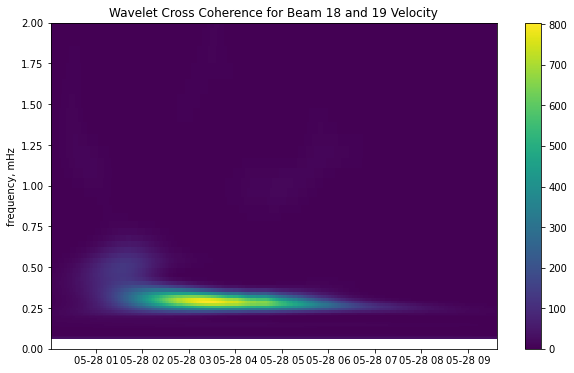

In [306]:
plt.figure(figsize=(10,6))
mesh = plt.pcolormesh(t1, 1/(60*cross_period)*1000., cross_power)
plt.ylim([0,2])
plt.colorbar(mesh)
plt.ylabel('frequency, mHz')
plt.title('Wavelet Cross Coherence for Beam 18 and 19 Velocity')

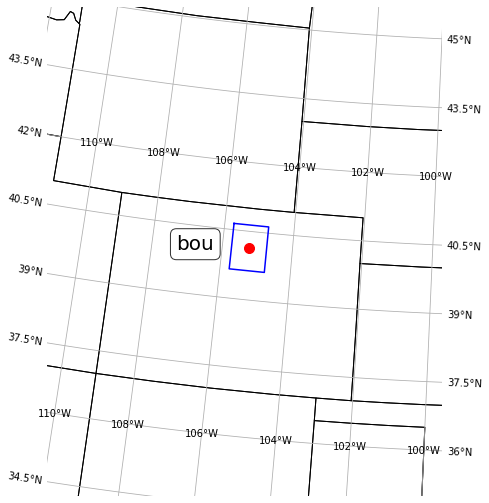

In [386]:
import cartopy.crs as ccrs
import pandas as pd
import cartopy.io.shapereader as shpreader
fig=plt.figure(figsize=(16,9))
stations = pd.DataFrame({"code" : ['bou', 'frd', 'frn'], "lat" : [40.137, 38.205, 37.091], "lon" : [-105.236, -77.383, -119.718]})
ax = plt.axes(projection=ccrs.LambertConformal(),frameon=False)
ax.set_extent([-110, -100, 35, 45], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp).geometries(),ccrs.PlateCarree(),facecolor='none', edgecolor='k')
ax.scatter(stations['lon'], stations['lat'], c='r', transform=ccrs.PlateCarree(), zorder=2, s=100)
n=0
lons = [stations['lon'][n]-.5, stations['lon'][n]+.5, stations['lon'][n]+.5, stations['lon'][n]-.5, stations['lon'][n]-.5]
lats = [stations['lat'][n]+.5, stations['lat'][n]+.5, stations['lat'][n]-.5, stations['lat'][n]-.5, stations['lat'][n]+.5]
ax.text(stations['lon'][n] -1, stations['lat'][n], stations['code'][n],verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree(),size=20,bbox=dict(facecolor='w', alpha=0.8, boxstyle='round'))
plt.plot(lons, lats, c='b', transform=ccrs.PlateCarree())
#for n in range(len(stations)):
#    ax.text(stations['lon'][n] -1, stations['lat'][n], stations['code'][n],verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree(),size=20,bbox=dict(facecolor='w', alpha=0.8, boxstyle='round'))
ax.gridlines(draw_labels=True)#, dms=True, x_inline=False, y_inline=False)